**Babynames comparison on basis of gender**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

In [3]:
names1880 = pd.read_csv("yob1880.txt", 
                        names=["name", "sex", "births"])

In [4]:
names1880.head()

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


In [5]:
names1880.groupby("sex").sum()

,births
sex,
F,90994
M,110490


In [6]:
years = range(1880, 2019)

In [7]:
pieces = []
columns = ["name", "sex", "births"]

In [9]:
for year in years:
    path = rf"./yob{year}.txt"
    frame = pd.read_csv(path, names=columns)
    frame['year'] = year
    pieces.append(frame)

In [10]:
names = pd.concat(pieces, ignore_index=True)

In [11]:
names.head()

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


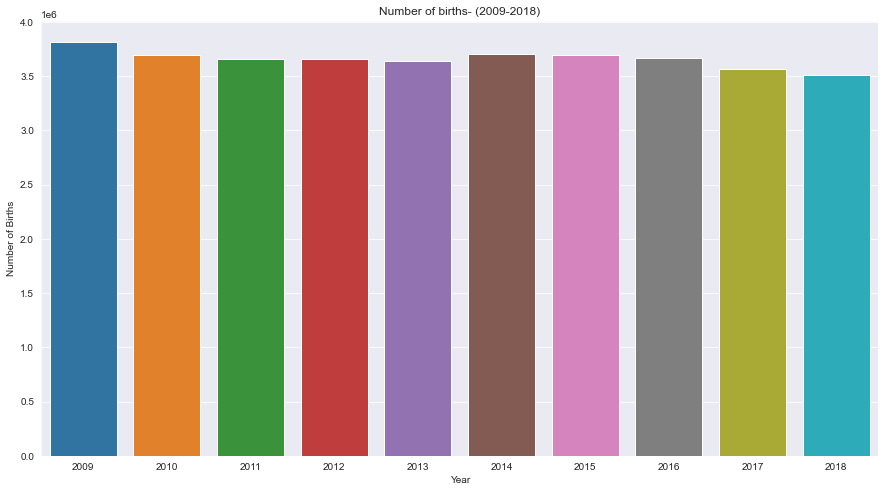

In [12]:
plt.figure(figsize=(15, 8))
_ = sns.barplot(y=names.groupby("year").sum().values[-10:].ravel(), x=list(years)[-10:])
plt.ylabel("Number of Births")
plt.xlabel("Year")
_ = plt.title("Number of births- (2009-2018)")

In [13]:
names.shape

(1957562, 4)

In [14]:
total_births = names.pivot_table(values="births", index="year", 
                                 columns="sex", aggfunc=sum)

In [15]:
total_births.tail()

sex,F,M
year,,
2014,1783719,1918065
2015,1782079,1913452
2016,1768360,1893917
2017,1722140,1846154
2018,1695654,1810309


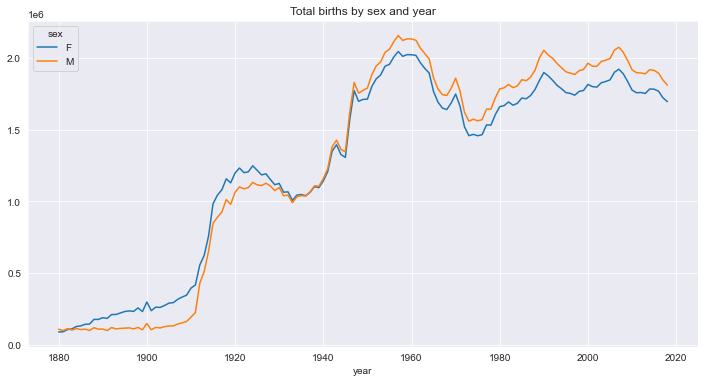

In [16]:
_ = total_births.plot(title='Total births by sex and year', figsize=(12, 6))

Inserting a column prop with the fraction of babies given each name relative to the total number of births. A prop value of 0.02 would indicate that 2 out of every 100 babies were given a particular name. Thus, we group the data by year and sex, then add the new column to each group

Result can be interpreted as: In the year 1880, every 77 female out of 100 were name "Mary"

In [17]:
def add_prop(group):
    group['prop'] = group.births / group.births.sum()
    return group

names = names.groupby(['year', 'sex']).apply(add_prop)

In [18]:

# for i, j in names.groupby(['year', 'sex']):
#     print(i)
#     print(j)
#     print(j.births)
#     print(j.births.sum())
#     break

In [19]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1957557,Zylas,M,5,2018,0.000003
1957558,Zyran,M,5,2018,0.000003
1957559,Zyrie,M,5,2018,0.000003
1957560,Zyron,M,5,2018,0.000003


In [20]:
# sanity check

names.groupby(['year', 'sex']).prop.sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2016  M      1.0
2017  F      1.0
      M      1.0
2018  F      1.0
      M      1.0
Name: prop, Length: 278, dtype: float64

In [21]:
# get top 1000 names sex/year

def get_top_1000(group):
    return group.sort_values(by="births", ascending=False)[:1000]

grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top_1000)
top1000.reset_index(inplace=True, drop=True)

In [22]:

# for i, j in top1000.groupby(['year', 'sex']):
#     print(i)
#     print(j.shape)
#     print()

In [23]:
top1000.take([1000, 2000, 30000, 13444])

,name,sex,births,year,prop
1000,Charley,M,305,1880,0.002760
2000,Nancy,F,429,1881,0.004665
30000,Amelia,F,379,1895,0.001622
13444,Artie,M,12,1886,0.000108


In [24]:
# we can see that both genders could contain the same name
top1000.loc[top1000["name"] == "Mary"].groupby("sex").births.sum()

sex
F    4125904
M      13817
Name: births, dtype: int64

In [25]:
# # another approach

# pieces = []
# for year, group in names.groupby(['year', 'sex']):
#  pieces.append(group.sort_values(by='births', ascending=False)[:1000])

# top1000 = pd.concat(pieces, ignore_index=True)

**Analyzing Naming Trends**

In [26]:

# splitting into male and female

boys = top1000[top1000.sex == "M"]
girls = top1000[top1000.sex == "F"]

In [27]:
total_births = top1000.pivot_table(values="births", index="year",
                                   columns="name", aggfunc=sum)
total_births

name,Aaden,Aadhya,Aaliyah,Aanya,Aarav,Aaron,Aarush,Ab,Abagail,Abb,...,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri,Zyaire
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,...,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN,NaN
1881,NaN,NaN,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,...,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN,NaN
1882,NaN,NaN,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,...,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN,NaN
1883,NaN,NaN,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,...,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN,NaN
1884,NaN,NaN,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,...,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014,239.0,NaN,4890.0,266.0,531.0,7401.0,NaN,NaN,NaN,NaN,...,5878.0,7423.0,366.0,NaN,NaN,NaN,NaN,NaN,666.0,NaN
2015,297.0,NaN,4866.0,NaN,541.0,7166.0,211.0,NaN,NaN,NaN,...,6043.0,6956.0,371.0,NaN,NaN,NaN,NaN,NaN,714.0,NaN
2016,NaN,284.0,4645.0,NaN,519.0,7166.0,NaN,NaN,NaN,NaN,...,5756.0,6455.0,314.0,NaN,NaN,NaN,NaN,NaN,890.0,248.0


In [28]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139 entries, 1880 to 2018
Columns: 7177 entries, Aaden to Zyaire
dtypes: float64(7177)
memory usage: 7.6 MB


In [29]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]

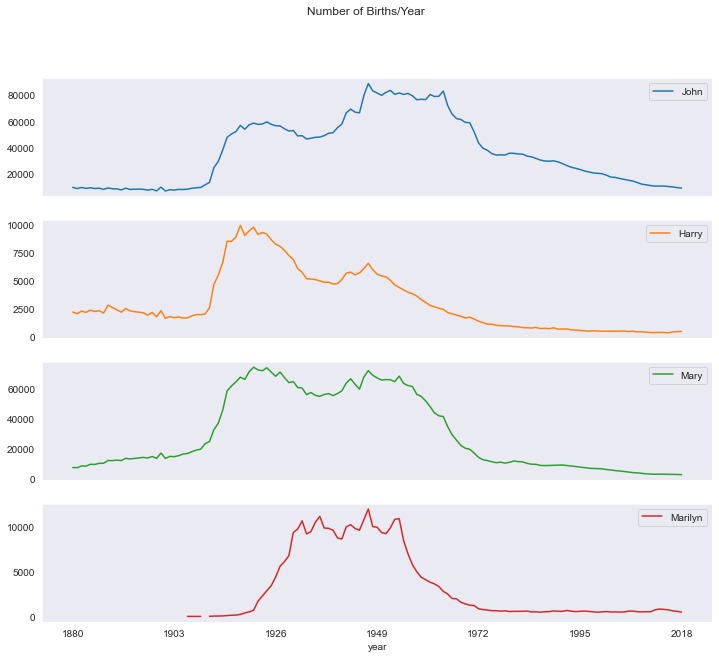

In [30]:

_ = subset.plot(subplots=True, figsize=(12, 10), grid=False,
            title="Number of Births/Year")
_ = plt.xticks(range(1880, 2019, 23))

**Measuring the increase in naming diversity**

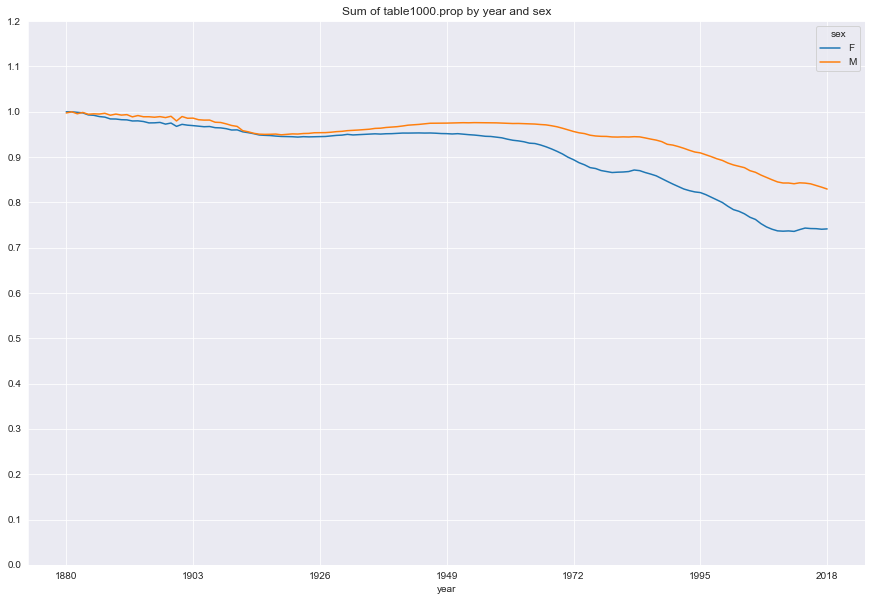

In [31]:
# decrease in usage of popular names

table = top1000.pivot_table(values='prop', index='year',
                            columns='sex', aggfunc=sum)
_ = table.plot(title='Sum of table1000.prop by year and sex',
           yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2019, 23),
           figsize=(15, 10)
)

Another interesting metric is the number of dis‐ tinct names, taken in order of popularity from highest to lowest, in the top 50% of births.

In [32]:
df = boys[boys.year == 2010]
df.prop.sum()

0.8428016818478419

After sorting prop in descending order, we want to know how many of the most popular names it takes to reach 50%

In [33]:
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()
prop_cumsum[:10]

260876    0.011548
260877    0.020940
260878    0.029995
260879    0.038961
260880    0.047858
260881    0.056599
260882    0.065184
260883    0.073451
260884    0.081558
260885    0.089643
Name: prop, dtype: float64

In [34]:
prop_cumsum.values.searchsorted(0.5)
# 117

116

It takes a name to used 116 times to get into top 50% names of 2010

In [35]:
df = boys[boys.year == 1900]

In [36]:
in1900 = df.sort_values(by="prop", ascending=False).prop.cumsum()
in1900.values.searchsorted(0.5) + 1

25

It 1900 it took just 25 times for a name to get into top 50%.

In [37]:
# getting count for each year/sex

def get_quantile_count(group, q=0.5):
    group = group.sort_values(by="prop", ascending=False)
    return group.prop.cumsum().values.searchsorted(q) + 1

In [38]:
diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
print(diversity)

year  sex
1880  F       38
      M       14
1881  F       38
      M       14
1882  F       38
            ... 
2016  M      139
2017  F      254
      M      143
2018  F      259
      M      149
Length: 278, dtype: int64


In [39]:
diversity = diversity.unstack("sex")

In [40]:
diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


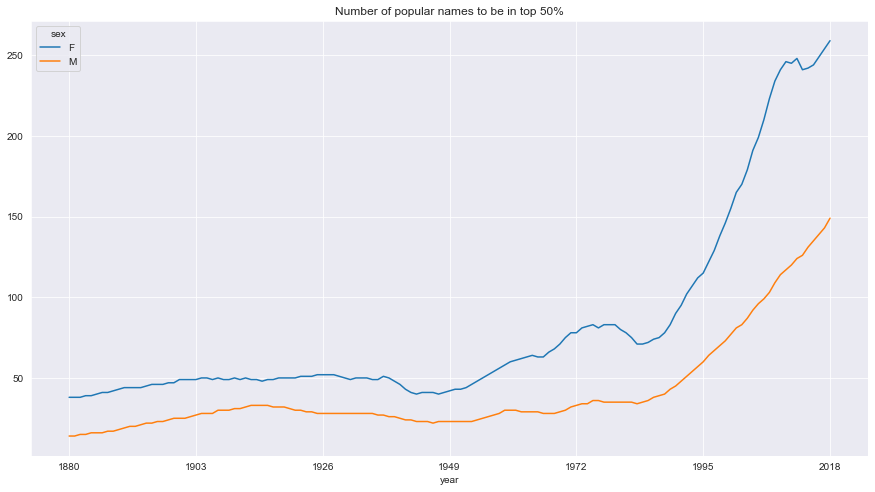

In [41]:
diversity.plot(title="Number of popular names to be in top 50%", figsize=(15, 8))
_ = plt.xticks(range(1880, 2019, 23))

**The "last letter" revolution**

In 2007, baby name researcher Laura Wattenberg pointed out on her website that the distribution of boy names by final letter has changed significantly over the last 100 years

In [42]:
# extract last letter

get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'

In [43]:
table = names.pivot_table(values="births", index=last_letters,
                          columns=['sex', 'year'], aggfunc=sum)
table

sex                F                                                        \
year            1880     1881     1882     1883     1884     1885     1886   
last_letter                                                                  
a            31446.0  31581.0  36536.0  38329.0  43680.0  45408.0  49100.0   
b                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c                NaN      NaN      5.0      5.0      NaN      NaN      NaN   
d              609.0    607.0    734.0    810.0    916.0    862.0   1007.0   
e            33381.0  34080.0  40399.0  41913.0  48089.0  49616.0  53883.0   
f                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
g                7.0      5.0     12.0      8.0     24.0     11.0     18.0   
h             4863.0   4783.0   5566.0   5701.0   6602.0   6623.0   7146.0   
i               61.0     78.0     81.0     76.0     84.0     92.0     85.0   
j                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
k               13.0     15.0     11.0     17.0     21.0     18.0     27.0   
l             2541.0   2910.0   3527.0   3848.0   4807.0   5144.0   5721.0   
m               58.0     57.0     81.0     86.0     79.0     75.0    103.0   
n             3008.0   2959.0   3575.0   3836.0   4507.0   4735.0   5242.0   
o               30.0     49.0     35.0     47.0     74.0     84.0     93.0   
p                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
q                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
r              481.0    417.0    590.0    640.0    718.0    799.0    917.0   
s             1391.0   1316.0   1637.0   1794.0   2038.0   2127.0   2524.0   
t             2152.0   2165.0   2399.0   2554.0   2824.0   2889.0   3017.0   
u              380.0    427.0    410.0    444.0    490.0    495.0    511.0   
v                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
w                NaN      5.0      NaN      NaN      NaN      NaN      5.0   
x                NaN      NaN      NaN      7.0      NaN      NaN      NaN   
y            10467.0  10404.0  12143.0  12063.0  13918.0  13927.0  14932.0   
z              106.0     95.0    106.0    141.0    148.0    150.0    202.0   

sex                                     ...         M                      \
year            1887     1888     1889  ...      2009      2010      2011   
last_letter                             ...                                 
a            48942.0  59440.0  58631.0  ...   31634.0   28882.0   27470.0   
b                NaN      NaN      NaN  ...   39106.0   39294.0   36690.0   
c                NaN      NaN      NaN  ...   24164.0   23357.0   23137.0   
d             1027.0   1298.0   1374.0  ...   46378.0   44851.0   43279.0   
e            54353.0  66748.0  66662.0  ...  136071.0  130307.0  128852.0   
f                NaN      NaN      NaN  ...    2216.0    2312.0    2302.0   
g               25.0     44.0     28.0  ...    2401.0    2697.0    2682.0   
h             7141.0   8630.0   8825.0  ...  100609.0   99352.0   98445.0   
i              105.0    141.0    134.0  ...   41125.0   43463.0   44570.0   
j                NaN      NaN      NaN  ...    1422.0    1480.0    1552.0   
k               19.0     21.0     22.0  ...   37665.0   35529.0   34268.0   
l             6174.0   7900.0   8395.0  ...  144401.0  135078.0  131926.0   
m               90.0    123.0    137.0  ...   46486.0   47365.0   50869.0   
n             5512.0   6832.0   7103.0  ...  718365.0  694804.0  690859.0   
o               97.0    134.0    142.0  ...   86650.0   81600.0   79401.0   
p                NaN      NaN      NaN  ...    2606.0    2432.0    2368.0   
q                NaN      NaN      NaN  ...     377.0     345.0     357.0   
r              910.0   1207.0   1214.0  ...  173854.0  167547.0  166249.0   
s             2803.0   3581.0   3569.0  ...  130446.0  124920.0  121498.0   
t             3140.0   3816.0   3784.0  ...

In [44]:
# https://www.geeksforgeeks.org/python-pandas-dataframe-reindex/

subtable = table.reindex(columns=[1910, 1960, 2000, 2018], level="year")

In [45]:
subtable.head()

sex                 F                                      M            \
year             1910      1960      2000      2018     1910      1960   
last_letter                                                              
a            108399.0  691278.0  676150.0  650193.0    977.0    5212.0   
b                 NaN     694.0     372.0     579.0    411.0    3911.0   
c                 5.0      49.0     525.0    1123.0    482.0   15457.0   
d              6751.0    3731.0    4383.0    3537.0  22113.0  262120.0   
e            133601.0  435023.0  318492.0  302355.0  28665.0  178760.0   

sex                              
year             2000      2018  
last_letter                      
a             40864.0   30931.0  
b             50933.0   22693.0  
c             27027.0   19463.0  
d             64355.0   41817.0  
e            148954.0  120029.0

In [46]:
# normalizing

subtable.sum()

sex  year
F    1910     396505.0
     1960    2022012.0
     2000    1815542.0
     2018    1695654.0
M    1910     194210.0
     1960    2132115.0
     2000    1963465.0
     2018    1810309.0
dtype: float64

Let's normalize the table by total births to compute a new table containing propor‐ tion of total births for each sex ending in each letter

In [47]:
letter_prop = subtable / subtable.sum()
letter_prop.fillna(0, inplace=True)
letter_prop.head()

sex                 F                                       M            \
year             1910      1960      2000      2018      1910      1960   
last_letter                                                               
a            0.273386  0.341876  0.372423  0.383447  0.005031  0.002445   
b            0.000000  0.000343  0.000205  0.000341  0.002116  0.001834   
c            0.000013  0.000024  0.000289  0.000662  0.002482  0.007250   
d            0.017026  0.001845  0.002414  0.002086  0.113861  0.122939   
e            0.336947  0.215144  0.175425  0.178312  0.147598  0.083842   

sex                              
year             2000      2018  
last_letter                      
a            0.020812  0.017086  
b            0.025940  0.012535  
c            0.013765  0.010751  
d            0.032776  0.023099  
e            0.075863  0.066303

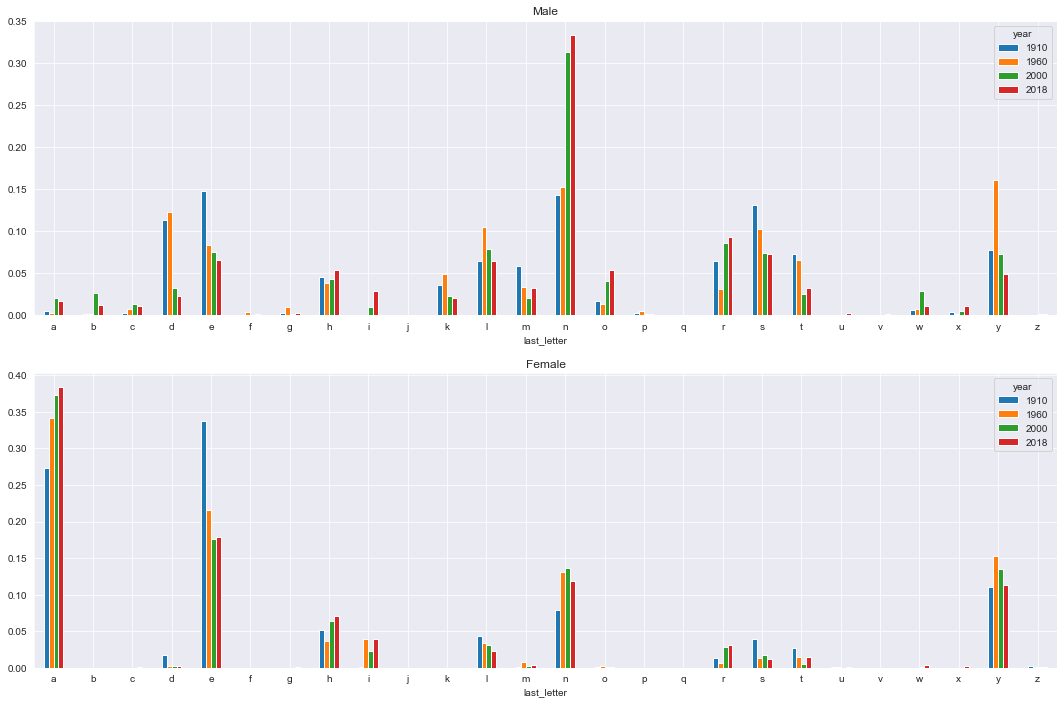

In [48]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female')
plt.tight_layout(pad=1.5)

In [49]:
letter_prop = table / table.sum()

In [50]:
dny_ts = letter_prop.loc[['d', 'n', 'y'], 'M'].T

In [51]:
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083057,0.153217,0.075763
1881,0.083246,0.153219,0.077458
1882,0.085332,0.149561,0.077538
1883,0.084053,0.151656,0.079149
1884,0.086122,0.149927,0.080408


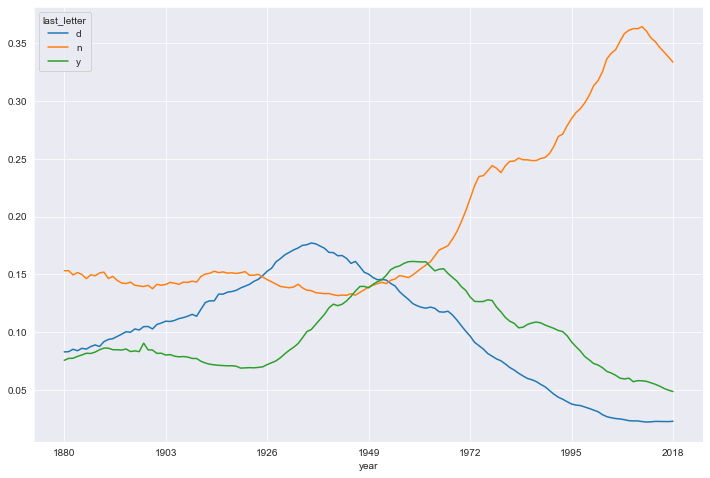

In [52]:
dny_ts.plot(figsize=(12, 8))
_ = plt.xticks(range(1880, 2019, 23))

**Boy names that became girl names (and vice versa)**

In [53]:
all_names = pd.Series(top1000.name.unique())

In [54]:
lesley_like = all_names[all_names.str.lower().str.contains('lesl')]
lesley_like

632     Leslie
2293    Lesley
4265    Leslee
4733     Lesli
6109     Lesly
dtype: object

In [55]:
filtered = top1000[top1000.name.isin(lesley_like)]
filtered

,name,sex,births,year,prop
632,Leslie,F,8,1880,0.000088
1108,Leslie,M,79,1880,0.000715
2461,Leslie,F,11,1881,0.000120
3014,Leslie,M,92,1881,0.000913
4511,Leslie,F,9,1882,0.000083
...,...,...,...,...,...
268842,Lesly,F,276,2014,0.000155
270246,Leslie,F,879,2015,0.000493
272290,Leslie,F,804,2016,0.000455
274325,Leslie,F,703,2017,0.000408


In [56]:
filtered.groupby('name').births.sum()

name
Leslee      1082
Lesley     35037
Lesli        929
Leslie    378185
Lesly      11433
Name: births, dtype: int64

In [57]:
table = filtered.pivot_table(values='births', index='year',
                             columns='sex', aggfunc='sum')
table

sex,F,M
year,,
1880,8.0,79.0
1881,11.0,92.0
1882,9.0,128.0
1883,7.0,125.0
1884,15.0,125.0
...,...,...
2014,1276.0,NaN
2015,879.0,NaN
2016,804.0,NaN


In [58]:
table = table.div(table.sum(1), axis=0)
table.tail()

sex,F,M
year,,
2014,1.0,NaN
2015,1.0,NaN
2016,1.0,NaN
2017,1.0,NaN
2018,1.0,NaN


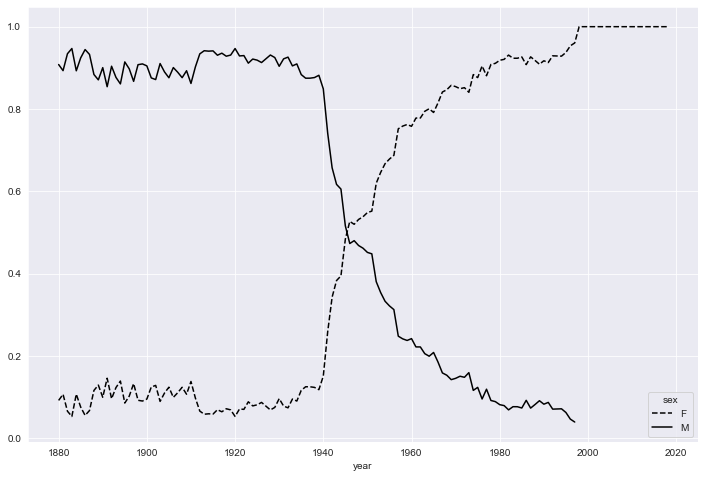

In [59]:
_ = table.plot(style={'M': 'k-', 'F': 'k--'}, figsize=(12, 8))